# Extract Training Dataset

1. Filter Annotation by malignancy
2. Load all dicom image with annotation
3. Find slices which has nodules
4. Save slices which has nodules

Use Encapsulation <br>
Normalization Using OpenCV

## Error Report
1. Reversed Slice Order
2. Image Number Mismatch <br>
    Label : contour / j =  range(ann.contour_slice_indices.shape[0]) <br> 
    Training : scan / j = ann.contour_slice_indices

In [1]:
import pylidc as pl
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
class AnnAll:
    """
    Do something for nodules, annotations in anns objects.
    
    Attributes
    ==========
    
    annotation_numbers : int
        Number of annotations in anns objects.
    """
    
    def __init__(self, anns):
        self.anns = anns
        self.nodule_num = anns.count()
        print("Total Nodule numbers :", self.nodule_num)
    
    def extractCT(self, addr):
        """
        extract CT images which has nodules
        """
        for i, ann in enumerate(self.anns):
            # Load image for each annotation
            image_all = ann.scan.load_all_dicom_images(verbose=False)
            
            for j in ann.contour_slice_indices:
                index_min = ann.contour_slice_indices[0]
                # Load image in numpy array
                image = image_all[j].pixel_array
                
                # Normalize the image
                norm_image = cv2.normalize(image, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)

                # Save Image
                cv2.imwrite(addr + str(i) + '_' + str(j - index_min) + ".png", 
                            norm_image)
            
            # Print progress for 50 images each
            if i%50 == 0:
                print("%d / %d Image Extraction Completed" % (i+1, self.nodule_num))

In [15]:
nonnodule = pl.query(pl.Annotation) \
    .filter(pl.Annotation.malignancy < 3) # malignancy < 3 : non-nodule (2600 nodules, 13115 images)
all1 = AnnAll(nonnodule)
all1.extractCT('./Training/non-nodules/image')

nodule = pl.query(pl.Annotation) \
    .filter(pl.Annotation.malignancy > 3) # malignancy > 3 : nodule (1653 nodules, 15221 images)
all1 = AnnAll(nonnodule)
all1.extractCT('./Training/nodules/image')

Total Nodule numbers : 2600
1 / 2600 Image Extraction Completed
51 / 2600 Image Extraction Completed
101 / 2600 Image Extraction Completed
151 / 2600 Image Extraction Completed
201 / 2600 Image Extraction Completed
251 / 2600 Image Extraction Completed
301 / 2600 Image Extraction Completed
351 / 2600 Image Extraction Completed
401 / 2600 Image Extraction Completed
451 / 2600 Image Extraction Completed
501 / 2600 Image Extraction Completed
551 / 2600 Image Extraction Completed
601 / 2600 Image Extraction Completed
651 / 2600 Image Extraction Completed
701 / 2600 Image Extraction Completed
751 / 2600 Image Extraction Completed
801 / 2600 Image Extraction Completed
851 / 2600 Image Extraction Completed
901 / 2600 Image Extraction Completed
951 / 2600 Image Extraction Completed
1001 / 2600 Image Extraction Completed
1051 / 2600 Image Extraction Completed
1101 / 2600 Image Extraction Completed
1151 / 2600 Image Extraction Completed
1201 / 2600 Image Extraction Completed
1251 / 2600 Image Ex

In [4]:
nodule = pl.query(pl.Annotation) \
    .filter(pl.Annotation.malignancy > 3) # malignancy > 3 : nodule (1653 nodules, 15221 images)
all2 = AnnAll(nodule)
all2.extractCT('./Training/nodules/image')

Total Nodule numbers : 1653
1 / 1653 Image Extraction Completed
51 / 1653 Image Extraction Completed
101 / 1653 Image Extraction Completed
151 / 1653 Image Extraction Completed
201 / 1653 Image Extraction Completed
251 / 1653 Image Extraction Completed
301 / 1653 Image Extraction Completed
351 / 1653 Image Extraction Completed
401 / 1653 Image Extraction Completed
451 / 1653 Image Extraction Completed
501 / 1653 Image Extraction Completed
551 / 1653 Image Extraction Completed
601 / 1653 Image Extraction Completed
651 / 1653 Image Extraction Completed
701 / 1653 Image Extraction Completed
751 / 1653 Image Extraction Completed
801 / 1653 Image Extraction Completed
851 / 1653 Image Extraction Completed
901 / 1653 Image Extraction Completed
951 / 1653 Image Extraction Completed
1001 / 1653 Image Extraction Completed
1051 / 1653 Image Extraction Completed
1101 / 1653 Image Extraction Completed
1151 / 1653 Image Extraction Completed
1201 / 1653 Image Extraction Completed
1251 / 1653 Image Ex

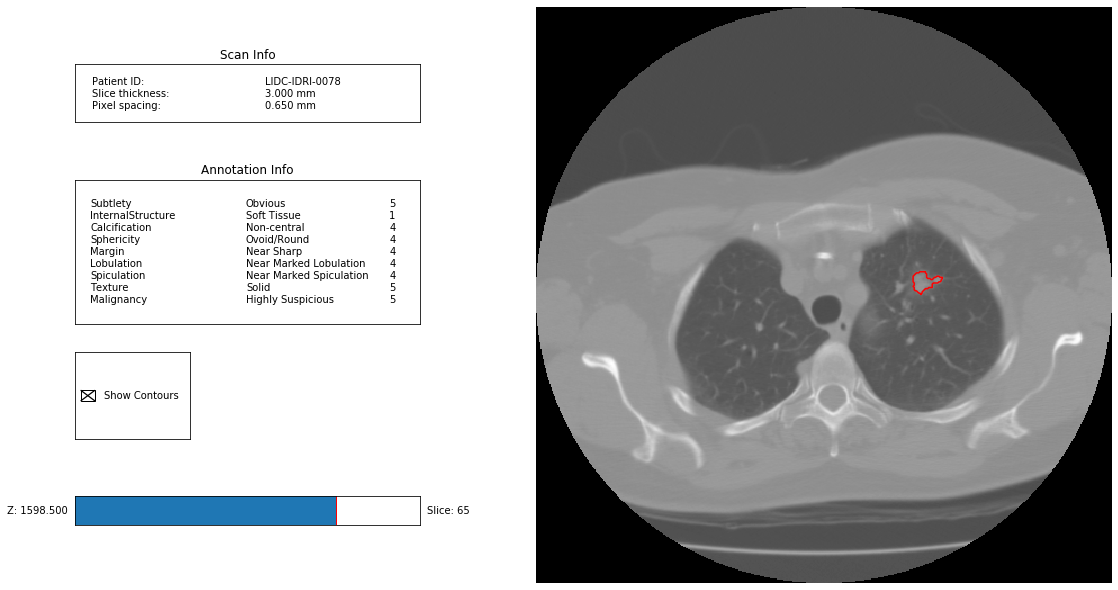

In [13]:
# Verify the relation between annotation and contour
ann = pl.query(pl.Annotation) \
    .filter(pl.Annotation.malignancy > 3).first()
print(ann)
contour = ann.contours
print(contour)
print(ann.contour_slice_zvals)
for i in range(len(contour)):
    print(contour[i].image_z_position)

Annotation(id=3,scan_id=1)
[Contour(id=13,annotation_id=3), Contour(id=14,annotation_id=3), Contour(id=15,annotation_id=3), Contour(id=16,annotation_id=3), Contour(id=17,annotation_id=3), Contour(id=18,annotation_id=3), Contour(id=19,annotation_id=3), Contour(id=20,annotation_id=3)]
[1595.5 1598.5 1601.5 1604.5 1607.5 1610.5 1613.5 1616.5]
1616.5
1613.5
1610.5
1607.5
1604.5
1601.5
1598.5
1595.5


In [15]:
# Verify the relation between scan and contour
print(ann.contour_slice_indices)
print(ann.contour_slice_zvals)

[64 65 66 67 68 69 70 71]
[1595.5 1598.5 1601.5 1604.5 1607.5 1610.5 1613.5 1616.5]


In [ ]:
contour.annotation.scan[71]